cross_val_score : 교차검증 정확도 값 리턴 \
cross_val_predict : 교차검증을 통한 예측값 리턴 \
StratifiedKFold 분류 데이터에서 카테고리의 분류가 공정하게 나누어지도록 해줌 \
clone() 을 사용하는 이유 : 파라미터값을 그대로 가져올 수 있다 
### 오차행렬 accuracy
- confusion_matrix : 오차행렬(혼돈행렬). [[TN, FP], [FN, TP]]
- 이진분류의 경우 오차행렬을 출력 가능 
- confusion_matrix의 결과가 sklearn에서는 Negative가 먼저 위치하는 것을 주의해야한다 
### 정밀도와 재현율 precision and recall
- 정밀도 precision : 양성예측 중 진짜 양성인 것. 얼마나 틀리지 않았는지 
- 재현율 recall : 진짜 양성 중 양성으로 분류된 것. 
precision_score, recall_score
### f1_score
- precision과 recall의 조화평균
- f1 = 2 / { (1/정밀도precision)+(1/재현율recall) }
from sklearn.metrics import f1_score \
f1_score(y, y_hat)

### decision_function
- decision_function 값이 0보다 크면 양성 , 작으면 음성으로 분류, 0보다 많이 크면 양성으로 분류된 것의 신뢰성이 강하다, 0보다 많이 작으면 음성으로 신뢰가 강하게 분류된 것이다.
- decision_function을 통해 샘플이 양성 클래스에 속할 확률값을 구한다 (precision, recall 모두 좋은 결과를 얻기 힘든 이유) precision, recall 각 값이 최고점일 때의 값 ... ? \
y_scores = agd_clf.decision_function([some_digit]) \
threhold = 0 \
예측결과가르기 = (y_scores > threshold)  \
예측결과가르기를 통해 True, False 로 값이 반환되어 결과를 확인할 수 있다.

y_scores = cross_val_predict(sgd_clf, x, y, cv=3, method='decision_function') \
decision_function을 이용하면 score값이 저장될 수 있다.

- precisions, recalls, thresholds 정밀도, 재현율, 임계값을 계산해준다. \
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, h_cross_hat)

precisions : 마지막 값은 1. 그래서 끝에 마지막값을 넣어주게 된다. \
recalss : 마지막 값은 0. \
thresholds 임계값. 결정함수값. 중복된 값은 제거된다.

threshold를 조절하며 precisions를 높이고 recalls 값을 낮춘 범위로 정해서 사용할 수 있다.

이러한 비교를 통해 어떤게 더 좋은 모델인지 알 수 있다.

### ROC 곡선
- 거짓 양성 비율에 대한 진짜 양성 비율 
- FPR에 대한 TPR의 비율 
- FPR 거짓양성비율 = FP / (FP+TN). (음성을 양성으로 잘못예측)/(실제 음성)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

어떤 모델이 더 좋은지 비교가 가능하다.

accuracy만 사용하면 정확한 평가가 힘들기 때문에 precision, recall, f1_score ... 를 같이 사용해야한다.


이진 분류기를 여러개 사용하여 다중 분류도 가능하다. \
OvR : 레이블을 타겟과 나머지로 나누어 training. 모든 레이블에 대해 각각 필요하다. \
OvO : 라벨값들을 둘 씩 조합하여 여러 개의 분류기를 훈련시킨다. \
요즘은 randomforest 를 많이 사용한다 ... ?

### 에러 분석

### 다중 레이블 분류
하나의 샘플이 여러 클래스에 속할 수 있는 분류.
하나의 사진에서 강아지, 토끼, 고양이 클래스를 찾아내는 분류.

### 다중 출력 분류
many-to-many
여러개의 input -> 여러개의 output


### Import

In [59]:
from keras.datasets import mnist
import ssl
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

### Dataset Load , train-test split

In [60]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Image data Show

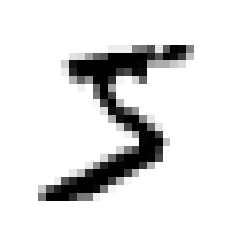

5


In [16]:
tmp_digit = train_X[0]
tmp_digit_image = tmp_digit.reshape(28,28)

plt.imshow(tmp_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print(train_y[0])

# 이진 분류기

In [118]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

In [119]:
y_train_5

array([False, False, False, ..., False, False, False])

In [121]:
from sklearn.linear_model import SGDClassifier

agd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
agd_clf.fit(X_train, y_train_5)

'''
tol 보다 좋은 값이 안나오면 training을 멈춰라
'''

ValueError: setting an array element with a sequence.

### Data Preprocessing

In [17]:
train_y = train_y.astype(np.uint8)
test_y = test_y.astype(np.uint8)

train_X=train_X.reshape(60000,784)
test_X=test_X.reshape(10000, 784)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_sc = scaler.fit_transform(train_X.astype(np.float64))
test_X_sc = scaler.fit_transform(test_X.astype(np.float64))


라벨값 확인

In [25]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [88]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']

# 1.
MNIST dataset으로 분류기를 만들어 test data에서 97% 정확도 이상을 내보아라. \
Hint : KNeigbborsClassifier, weights와 n_neighbors 하이퍼파라미터를 이용한 그리드 탐색 시도.

### Grid Search & Modeling

파라미터 값을 조정하는 방법 
1. 단순하게 좋은 파라미터 값을 찾을 때 까지 하이퍼파라미터를 손수 조정한다. (경우의 수가 많고 시간이 많이 듦) 
2. sklearn.GridSearchCV 를 사용해 탐색하고자 하는 하이퍼파라미터값을 설정해주면 가능한 조합을 교차 검증 평가한다.

In [62]:
'''
 시도할 파라미터 값들 나열 
 파라미터값은 해당 모델의 파라미터값 참고
'''

param_grid_one = [
    {'n_neighbors': [5,7,10], 'weights':['distance','uniform'], 'metric':['mantattan','euclidean']}
]

In [61]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid_one, cv=5, verbose=3, n_jobs=-1)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 2/5] END metric=mantattan, n_neighbors=5, weights=distance;, score=nan total time=   3.2s
[CV 3/5] END metric=mantattan, n_neighbors=5, weights=distance;, score=nan total time=   3.3s
[CV 4/5] END metric=mantattan, n_neighbors=5, weights=distance;, score=nan total time=   3.3s
[CV 1/5] END metric=mantattan, n_neighbors=5, weights=distance;, score=nan total time=   3.6s
[CV 2/5] END metric=mantattan, n_neighbors=5, weights=uniform;, score=nan total time=   0.9s
[CV 5/5] END metric=mantattan, n_neighbors=5, weights=distance;, score=nan total time=   0.9s
[CV 1/5] END metric=mantattan, n_neighbors=5, weights=uniform;, score=nan total time=   0.9s
[CV 3/5] END metric=mantattan, n_neighbors=5, weights=uniform;, score=nan total time=   0.9s
[CV 4/5] END metric=mantattan, n_neighbors=5, weights=uniform;, score=nan total time=   0.7s
[CV 5/5] END metric=mantattan, n_neighbors=5, weights=uniform;, score=nan total time=   0.7s
[CV 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/py

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'metric': ['mantattan', 'euclidean'],
                          'n_neighbors': [5, 7, 10],
                          'weights': ['distance', 'uniform']}],
             verbose=3)

In [65]:
print("가장 적합한 파라미터값 : " ,knn_grid.best_params_, "을 이용했을 때 나온 최고 정확도 : ", knn_grid.best_score_)

가장 적합한 파라미터값 :  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'} 을 이용했을 때 나온 최고 정확도 :  0.9704166666666667


In [66]:
from sklearn.metrics import accuracy_score

y_pred = knn_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.9691

아래는 그리드 서치를 사용하지 않았을 때의 모델링 시도 코드임.

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')
knn_clf.fit(train_X, train_y)


y_hat = knn_clf.predict(test_X)
accuracy_score(test_y, y_hat)
# 0.97

0.97

In [13]:
knn_clf_sc = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean')
knn_clf_sc.fit(train_X_sc, train_y)

y_hat = knn_clf.predict(test_X_sc)
accuracy_score(test_y, y_hat)

0.1135

# 2. MNIST 이미지를 왼/오/위/아래 어디든 한 픽셀 이동시킬 수 있는 함수를 만들어라.
+ train dataset의 각 이미지에 대해 해당 함수를 적용하고 이를 이용해 모델링 해라.
+ test dataset에서 정확도를 측정해라.

In [ ]:
from scipy.ndimage.interpolation import shift
# scipy.ndimage.shift

/var/folders/0s/knzc6bzs1l9dgw6x4k24t9740000gn/T/ipykernel_54429/987197595.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [69]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    # shifted_image = shift(image, -10, cval=50, mode="constant")
    return shifted_image.reshape([-1])

(784,) (28, 28)
(784,) (28, 28)


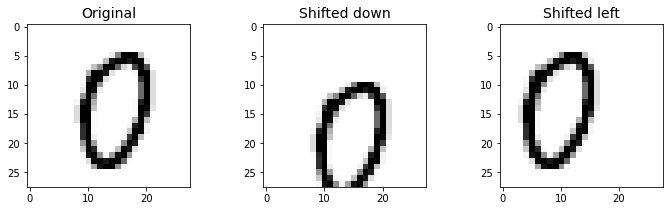

In [70]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
print(image.shape, image.reshape(28,28).shape)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
print(shifted_image_down.shape, shifted_image_down.reshape(28,28).shape)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [71]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [72]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [74]:
knn_clf = KNeighborsClassifier(**knn_grid.best_params_)

In [75]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [76]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9766